In [1]:
from os import listdir
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
import random

In [2]:
DIRECTORYtest = "yale7/test/"
DIRECTORYtrain = "yale7/train/"

In [3]:
def createMask(size,path):
    img=cv2.imread(path,0)
    # size: size of the mask
    # 10% of the original image(10x10),20%(14x14),30%(17x17),50%(22x22)
    mask = np.zeros([32,32],dtype=np.uint8)
    x = np.random.randint(0,32-size)
    y = np.random.randint(0,32-size)
    l=np.random.randint(0,2,[size,size],dtype=np.uint8)*255
    # generalize black-white wise block for masking
    mask[x:x+size,y:y+size]=l
    # add mask to the image(white part) 
    image=cv2.add(img,mask)
    # generate the black part
    for i in range(x,x+size):
        for j in range(y,y+size):
            if image[i,j]<255:
                image[i,j]=0
    return image

In [4]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)

In [5]:
def saveImage(size):
    i=1
    for filename in tqdm(list_files(DIRECTORYtest, "subject")):
        path = DIRECTORYtest + filename
        face=createMask(size,path)
        print(path,filename)
        plt.imshow(face)
        figure_save_path = "yale-train-test-mask/yale-test-mask-"+str(size)+'/'
        if not os.path.exists(figure_save_path):
            os.makedirs(figure_save_path)
        plt.imsave(figure_save_path+filename,face)
        i+=1
    j=1
    for filename in tqdm(list_files(DIRECTORYtrain, "subject")):
        path = DIRECTORYtrain + filename
        face=createMask(size,path)
        print(path,filename)
        plt.imshow(face)
        figure_save_path = "yale-train-test-mask/yale-train-mask-"+str(size)+'/'
        if not os.path.exists(figure_save_path):
            os.makedirs(figure_save_path)
        plt.imsave(figure_save_path+filename,face)
        j+=1


100%|██████████████████████████████████████████| 60/60 [00:00<00:00, 643.14it/s]


yale7/test/subject10.normal.png subject10.normal.png
yale7/test/subject03.happy.png subject03.happy.png
yale7/test/subject13.glasses.png subject13.glasses.png
yale7/test/subject04.surprised.png subject04.surprised.png
yale7/test/subject09.noglasses.png subject09.noglasses.png
yale7/test/subject04.normal.png subject04.normal.png
yale7/test/subject11.happy.png subject11.happy.png
yale7/test/subject05.happy.png subject05.happy.png
yale7/test/subject03.surprised.png subject03.surprised.png
yale7/test/subject13.centerlight.png subject13.centerlight.png
yale7/test/subject15.normal.png subject15.normal.png
yale7/test/subject06.wink.png subject06.wink.png
yale7/test/subject07.sad.png subject07.sad.png
yale7/test/subject02.happy.png subject02.happy.png
yale7/test/subject05.leftlight.png subject05.leftlight.png
yale7/test/subject12.centerlight.png subject12.centerlight.png
yale7/test/subject12.leftlight.png subject12.leftlight.png
yale7/test/subject01.leftlight.png subject01.leftlight.png
yale7/

100%|███████████████████████████████████████| 105/105 [00:00<00:00, 1138.21it/s]


yale7/train/subject09.sleepy.png subject09.sleepy.png
yale7/train/subject14.centerlight.png subject14.centerlight.png
yale7/train/subject15.sleepy.png subject15.sleepy.png
yale7/train/subject06.glasses.png subject06.glasses.png
yale7/train/subject08.leftlight.png subject08.leftlight.png
yale7/train/subject04.sleepy.png subject04.sleepy.png
yale7/train/subject01.normal.png subject01.normal.png
yale7/train/subject02.centerlight.png subject02.centerlight.png
yale7/train/subject13.surprised.png subject13.surprised.png
yale7/train/subject04.sad.png subject04.sad.png
yale7/train/subject14.sad.png subject14.sad.png
yale7/train/subject05.centerlight.png subject05.centerlight.png
yale7/train/subject14.surprised.png subject14.surprised.png
yale7/train/subject01.sleepy.png subject01.sleepy.png
yale7/train/subject01.wink.png subject01.wink.png
yale7/train/subject15.sad.png subject15.sad.png
yale7/train/subject10.surprised.png subject10.surprised.png
yale7/train/subject05.sad.png subject05.sad.png


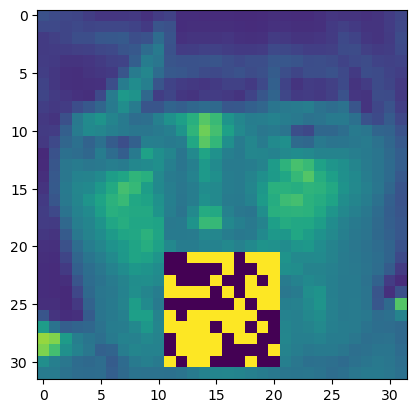

In [13]:
saveImage(10)

100%|██████████████████████████████████████████| 60/60 [00:00<00:00, 609.27it/s]


yale7/test/subject10.normal.png subject10.normal.png
yale7/test/subject03.happy.png subject03.happy.png
yale7/test/subject13.glasses.png subject13.glasses.png
yale7/test/subject04.surprised.png subject04.surprised.png
yale7/test/subject09.noglasses.png subject09.noglasses.png
yale7/test/subject04.normal.png subject04.normal.png
yale7/test/subject11.happy.png subject11.happy.png
yale7/test/subject05.happy.png subject05.happy.png
yale7/test/subject03.surprised.png subject03.surprised.png
yale7/test/subject13.centerlight.png subject13.centerlight.png
yale7/test/subject15.normal.png subject15.normal.png
yale7/test/subject06.wink.png subject06.wink.png
yale7/test/subject07.sad.png subject07.sad.png
yale7/test/subject02.happy.png subject02.happy.png
yale7/test/subject05.leftlight.png subject05.leftlight.png
yale7/test/subject12.centerlight.png subject12.centerlight.png
yale7/test/subject12.leftlight.png subject12.leftlight.png
yale7/test/subject01.leftlight.png subject01.leftlight.png
yale7/

 96%|█████████████████████████████████████▌ | 101/105 [00:00<00:00, 1004.97it/s]

yale7/train/subject09.sleepy.png subject09.sleepy.png
yale7/train/subject14.centerlight.png subject14.centerlight.png
yale7/train/subject15.sleepy.png subject15.sleepy.png
yale7/train/subject06.glasses.png subject06.glasses.png
yale7/train/subject08.leftlight.png subject08.leftlight.png
yale7/train/subject04.sleepy.png subject04.sleepy.png
yale7/train/subject01.normal.png subject01.normal.png
yale7/train/subject02.centerlight.png subject02.centerlight.png
yale7/train/subject13.surprised.png subject13.surprised.png
yale7/train/subject04.sad.png subject04.sad.png
yale7/train/subject14.sad.png subject14.sad.png
yale7/train/subject05.centerlight.png subject05.centerlight.png
yale7/train/subject14.surprised.png subject14.surprised.png
yale7/train/subject01.sleepy.png subject01.sleepy.png
yale7/train/subject01.wink.png subject01.wink.png
yale7/train/subject15.sad.png subject15.sad.png
yale7/train/subject10.surprised.png subject10.surprised.png
yale7/train/subject05.sad.png subject05.sad.png


100%|████████████████████████████████████████| 105/105 [00:00<00:00, 983.53it/s]


yale7/train/subject11.centerlight.png subject11.centerlight.png


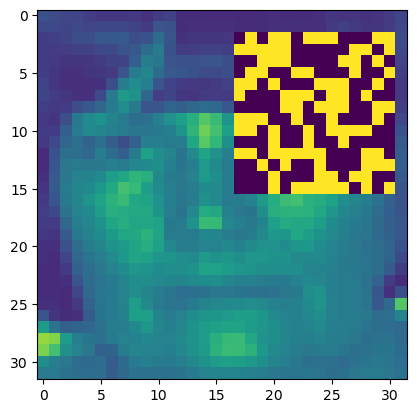

In [15]:
saveImage(14)

100%|██████████████████████████████████████████| 60/60 [00:00<00:00, 574.21it/s]


yale7/test/subject10.normal.png subject10.normal.png
yale7/test/subject03.happy.png subject03.happy.png
yale7/test/subject13.glasses.png subject13.glasses.png
yale7/test/subject04.surprised.png subject04.surprised.png
yale7/test/subject09.noglasses.png subject09.noglasses.png
yale7/test/subject04.normal.png subject04.normal.png
yale7/test/subject11.happy.png subject11.happy.png
yale7/test/subject05.happy.png subject05.happy.png
yale7/test/subject03.surprised.png subject03.surprised.png
yale7/test/subject13.centerlight.png subject13.centerlight.png
yale7/test/subject15.normal.png subject15.normal.png
yale7/test/subject06.wink.png subject06.wink.png
yale7/test/subject07.sad.png subject07.sad.png
yale7/test/subject02.happy.png subject02.happy.png
yale7/test/subject05.leftlight.png subject05.leftlight.png
yale7/test/subject12.centerlight.png subject12.centerlight.png
yale7/test/subject12.leftlight.png subject12.leftlight.png
yale7/test/subject01.leftlight.png subject01.leftlight.png
yale7/

  0%|                                                   | 0/105 [00:00<?, ?it/s]

yale7/train/subject09.sleepy.png subject09.sleepy.png
yale7/train/subject14.centerlight.png subject14.centerlight.png
yale7/train/subject15.sleepy.png subject15.sleepy.png
yale7/train/subject06.glasses.png subject06.glasses.png
yale7/train/subject08.leftlight.png subject08.leftlight.png
yale7/train/subject04.sleepy.png subject04.sleepy.png
yale7/train/subject01.normal.png subject01.normal.png
yale7/train/subject02.centerlight.png subject02.centerlight.png
yale7/train/subject13.surprised.png subject13.surprised.png
yale7/train/subject04.sad.png subject04.sad.png
yale7/train/subject14.sad.png subject14.sad.png
yale7/train/subject05.centerlight.png subject05.centerlight.png
yale7/train/subject14.surprised.png subject14.surprised.png
yale7/train/subject01.sleepy.png subject01.sleepy.png
yale7/train/subject01.wink.png subject01.wink.png
yale7/train/subject15.sad.png subject15.sad.png
yale7/train/subject10.surprised.png subject10.surprised.png
yale7/train/subject05.sad.png subject05.sad.png


100%|████████████████████████████████████████| 105/105 [00:00<00:00, 600.04it/s]


yale7/train/subject06.leftlight.png subject06.leftlight.png
yale7/train/subject03.noglasses.png subject03.noglasses.png
yale7/train/subject10.happy.png subject10.happy.png
yale7/train/subject15.leftlight.png subject15.leftlight.png
yale7/train/subject10.noglasses.png subject10.noglasses.png
yale7/train/subject03.sleepy.png subject03.sleepy.png
yale7/train/subject05.glasses.png subject05.glasses.png
yale7/train/subject12.sleepy.png subject12.sleepy.png
yale7/train/subject02.glasses.png subject02.glasses.png
yale7/train/subject06.noglasses.png subject06.noglasses.png
yale7/train/subject15.happy.png subject15.happy.png
yale7/train/subject09.wink.png subject09.wink.png
yale7/train/subject08.wink.png subject08.wink.png
yale7/train/subject11.noglasses.png subject11.noglasses.png
yale7/train/subject03.sad.png subject03.sad.png
yale7/train/subject14.leftlight.png subject14.leftlight.png
yale7/train/subject03.leftlight.png subject03.leftlight.png
yale7/train/subject13.rightlight.png subject13.r

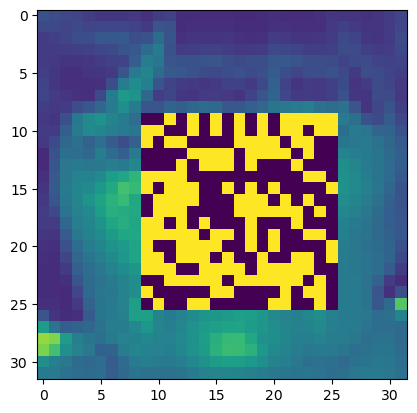

In [9]:
saveImage(17)

100%|██████████████████████████████████████████| 60/60 [00:00<00:00, 509.19it/s]


yale7/test/subject10.normal.png subject10.normal.png
yale7/test/subject03.happy.png subject03.happy.png
yale7/test/subject13.glasses.png subject13.glasses.png
yale7/test/subject04.surprised.png subject04.surprised.png
yale7/test/subject09.noglasses.png subject09.noglasses.png
yale7/test/subject04.normal.png subject04.normal.png
yale7/test/subject11.happy.png subject11.happy.png
yale7/test/subject05.happy.png subject05.happy.png
yale7/test/subject03.surprised.png subject03.surprised.png
yale7/test/subject13.centerlight.png subject13.centerlight.png
yale7/test/subject15.normal.png subject15.normal.png
yale7/test/subject06.wink.png subject06.wink.png
yale7/test/subject07.sad.png subject07.sad.png
yale7/test/subject02.happy.png subject02.happy.png
yale7/test/subject05.leftlight.png subject05.leftlight.png
yale7/test/subject12.centerlight.png subject12.centerlight.png
yale7/test/subject12.leftlight.png subject12.leftlight.png
yale7/test/subject01.leftlight.png subject01.leftlight.png
yale7/

  0%|                                                   | 0/105 [00:00<?, ?it/s]

yale7/train/subject09.sleepy.png subject09.sleepy.png
yale7/train/subject14.centerlight.png subject14.centerlight.png
yale7/train/subject15.sleepy.png subject15.sleepy.png
yale7/train/subject06.glasses.png subject06.glasses.png
yale7/train/subject08.leftlight.png subject08.leftlight.png
yale7/train/subject04.sleepy.png subject04.sleepy.png
yale7/train/subject01.normal.png subject01.normal.png
yale7/train/subject02.centerlight.png subject02.centerlight.png
yale7/train/subject13.surprised.png subject13.surprised.png
yale7/train/subject04.sad.png subject04.sad.png
yale7/train/subject14.sad.png subject14.sad.png
yale7/train/subject05.centerlight.png subject05.centerlight.png
yale7/train/subject14.surprised.png subject14.surprised.png
yale7/train/subject01.sleepy.png subject01.sleepy.png
yale7/train/subject01.wink.png subject01.wink.png
yale7/train/subject15.sad.png subject15.sad.png
yale7/train/subject10.surprised.png subject10.surprised.png
yale7/train/subject05.sad.png subject05.sad.png


100%|████████████████████████████████████████| 105/105 [00:00<00:00, 765.69it/s]


yale7/train/subject08.surprised.png subject08.surprised.png
yale7/train/subject02.sad.png subject02.sad.png
yale7/train/subject07.rightlight.png subject07.rightlight.png
yale7/train/subject12.rightlight.png subject12.rightlight.png
yale7/train/subject05.sleepy.png subject05.sleepy.png
yale7/train/subject07.glasses.png subject07.glasses.png
yale7/train/subject13.leftlight.png subject13.leftlight.png
yale7/train/subject04.leftlight.png subject04.leftlight.png
yale7/train/subject05.rightlight.png subject05.rightlight.png
yale7/train/subject11.surprised.png subject11.surprised.png
yale7/train/subject14.happy.png subject14.happy.png
yale7/train/subject02.sleepy.png subject02.sleepy.png
yale7/train/subject02.surprised.png subject02.surprised.png
yale7/train/subject12.wink.png subject12.wink.png
yale7/train/subject10.sad.png subject10.sad.png
yale7/train/subject13.sleepy.png subject13.sleepy.png
yale7/train/subject11.glasses.png subject11.glasses.png
yale7/train/subject01.sad.png subject01.sa

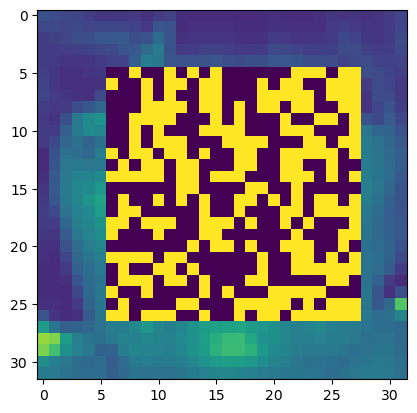

In [16]:
saveImage(22)